# **Breast Cancer Classification Using KNN and Gausian Naive Bayes**

##### **Dataset: -** It is given by Kaggle from UCI Machine Learning Repository, in one of its challenges. It is a dataset of Breast Cancer patients with Malignant and Benign tumors. K-nearest neighbour and Gaussian Naive Bayes algorithms are used to predict whether a patient has a malignant tumour (cancer) or not (Benign tumour).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UCI_breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# drop column 'id' and 'Unnamed: 32'
df = df.drop(['id'], axis=1)
df.shape



(569, 31)

In [5]:
# Check the 'diagnosis' column
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [6]:
# Convert 'diagnosis' value to binary value
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['diagnosis'].dtype

dtype('int64')

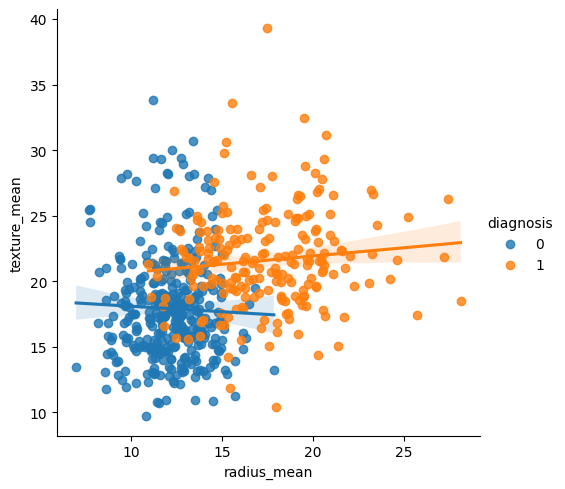

In [8]:
# Built lmplot for between 'radius mean' and 'texture mean' with hue as 'diagnosis'
sns.lmplot(x='radius_mean', y='texture_mean', data=df, hue='diagnosis')

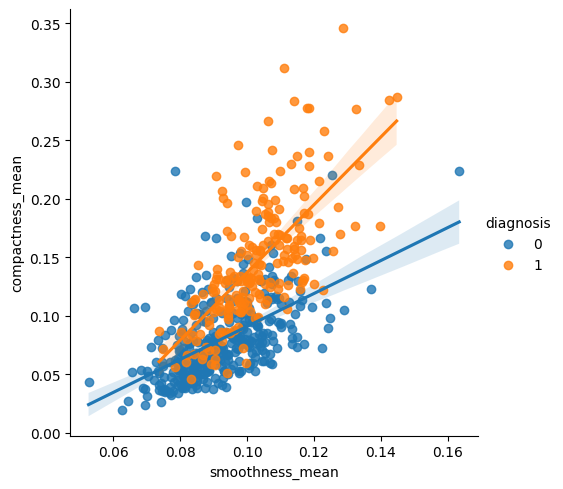

In [9]:
# Built lmplot for between 'smoothness_mean' and 'compactness_mean' with hue as 'diagnosis'
sns.lmplot(x='smoothness_mean', y='compactness_mean', data=df, hue='diagnosis')


##### In essence, this **lmplot** is a useful exploratory data analysis (EDA) technique to visualize potential correlations and the separability of classes based on pairs of features.
##### Key Points from *lmPlots*:
1. **Separability of Classes** between 'radius_mean' and 'texture_mean' for benign and malignant classes shows:-
- If the points for benign and malignant tumors are largely clustered in different areas of the plot with little overlap, you can conclude that 'radius_mean' and 'texture_mean' are likely good features for distinguishing between the two diagnosis types.

- If there is significant overlap between the clusters of benign and malignant points, it suggests that these two features alone may not be sufficient to perfectly separate the classes.

2. **Distribution of Classes** gives the spread of points within each color group gives you an idea of the variability of 'radius_mean' and 'texture_mean' for benign and malignant tumors.

- If the points within a group are tightly clustered, it suggests low variability for those features within that diagnosis type.

- If the points are spread out, it suggests higher variability.

In [10]:
# Split the data into X, y with diagnosis as target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [38]:
# Split the data into training and testing part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# use sklearn to apply KNN with n neighbors as 13
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [40]:
# Print accuracy score of KNN model
print("Accuracy of the KNN model is: ", knn.score(X_test, y_test)*100)

Accuracy of the KNN model is:  97.36842105263158


In [42]:
y_pred= knn.predict(X_test)

print("\nKNN Model Evaluation without SMOTE Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



KNN Model Evaluation without SMOTE Data:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

In [15]:
# Perform cross validation with 10 folds and store the value in array as neighbors with cv score value
neighbors = np.arange(1, 50, 2)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [16]:
MSE = [1-x for x in cv_scores]

In [17]:
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 3


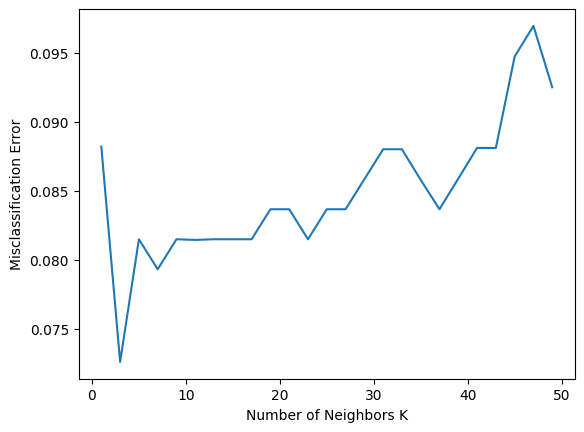

In [18]:
# Plot missclassification error versus k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<Axes: ylabel='count'>

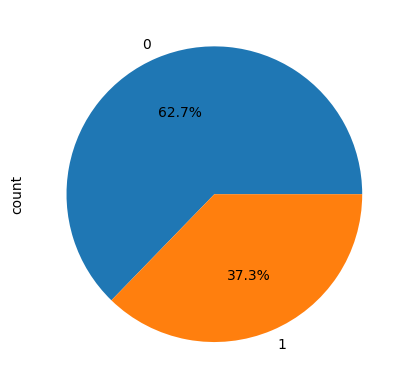

In [19]:
# Plot pie chart between '0' and '1' target variabel in diagnosis column
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [20]:
# Import, Build and train the GaussianNB Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
# Make predictions on first 10 data values using gnb model
y_pred = gnb.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [22]:
# Print accuracy of 'gnb' model.
print("Accuracy of the model is: ", gnb.score(X_test, y_test)*100)

Accuracy of the model is:  97.36842105263158


### There is imbalanced data that can lead to inaccurate predictions. So  using SMOTE to oversample the minority class (malignant tumors) is a common and often effective approach to improve the model's ability to identify these critical cases.

In [23]:
!pip install update imbalanced-learn

In [24]:
# First, let's update scikit-learn
# !pip install --upgrade scikit-learn

In [25]:
#!pip install --upgrade imbalanced-learn

In [26]:
# Now, try importing SMOTE again
from imblearn.over_sampling import SMOTE

In [27]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
diagnosis
0    286
1    286
Name: count, dtype: int64


In [28]:
# Train KNN model with SMOTE data
from sklearn.neighbors import KNeighborsClassifier

knn_smote = KNeighborsClassifier(n_neighbors=optimal_k) # Use the optimal_k found earlier
knn_smote.fit(X_train_smote, y_train_smote)


KNeighborsClassifier(n_neighbors=np.int64(3))

In [29]:
# Evaluate KNN model with SMOTE data on the original test set
from sklearn.metrics import accuracy_score, classification_report

y_pred_knn_smote = knn_smote.predict(X_test)

print("\nKNN Model Evaluation with SMOTE Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_smote))



KNN Model Evaluation with SMOTE Data:
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [30]:
# Train Gaussian Naive Bayes model with SMOTE data
from sklearn.naive_bayes import GaussianNB

gnb_smote = GaussianNB()
gnb_smote.fit(X_train_smote, y_train_smote)


GaussianNB()

In [31]:
# Evaluate Gaussian Naive Bayes model with SMOTE data on the original test set
y_pred_gnb_smote = gnb_smote.predict(X_test)

print("\nGaussian Naive Bayes Model Evaluation with SMOTE Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb_smote))


Gaussian Naive Bayes Model Evaluation with SMOTE Data:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
# Get the list of numerical features (excluding 'diagnosis')
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Ensure 'diagnosis' is not in the list if it's already numerical
if 'diagnosis' in numerical_features:
    numerical_features.remove('diagnosis')

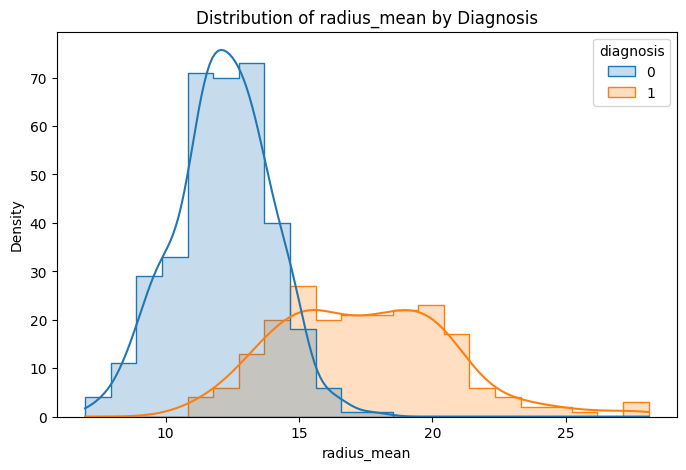

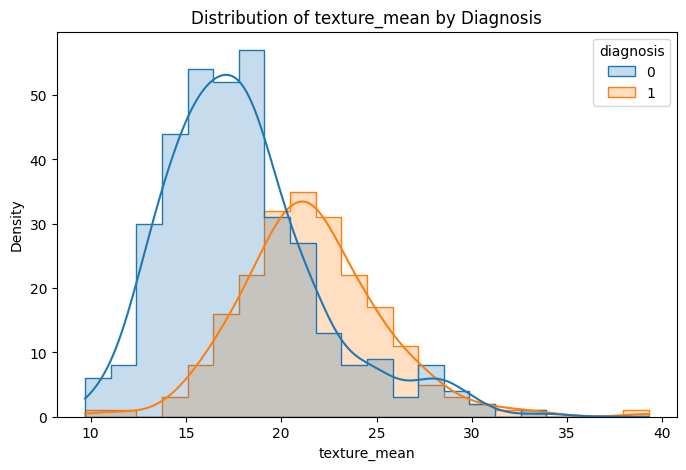

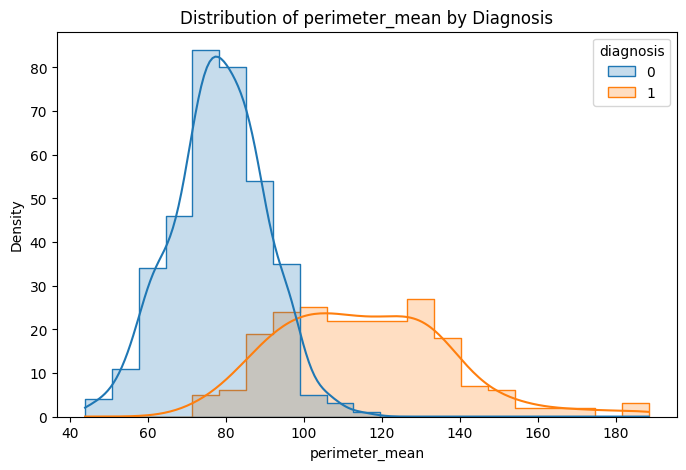

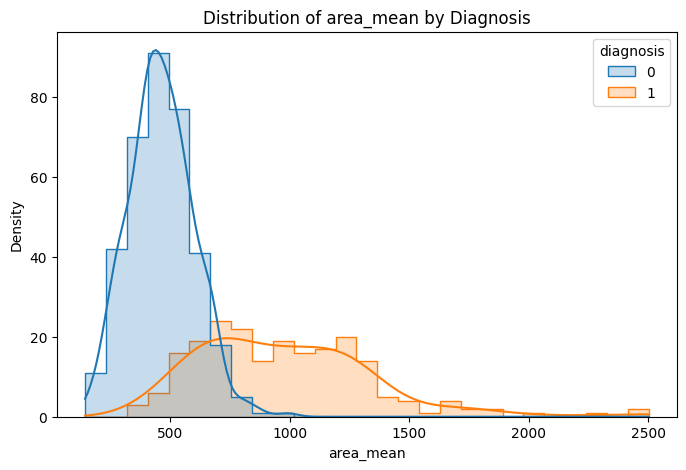

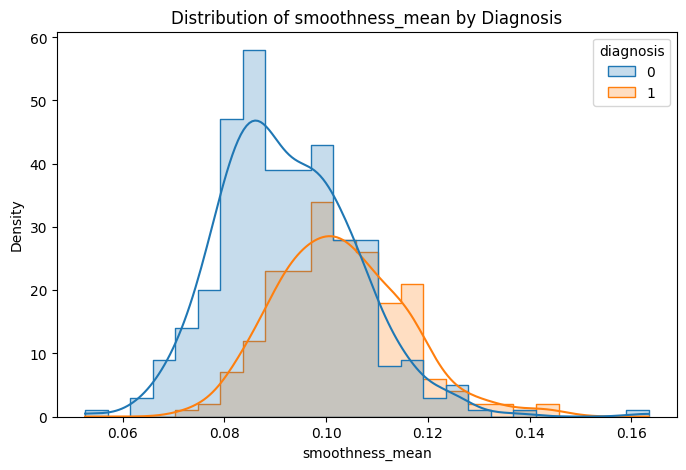

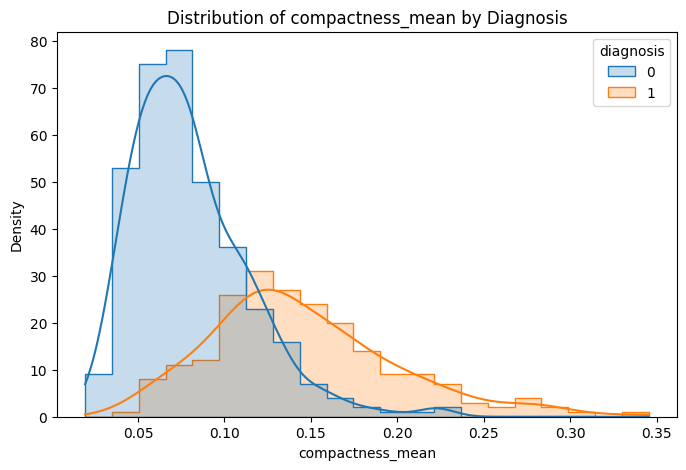

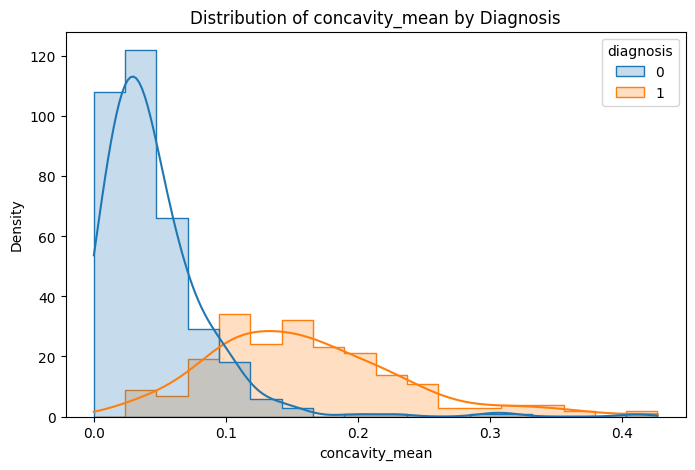

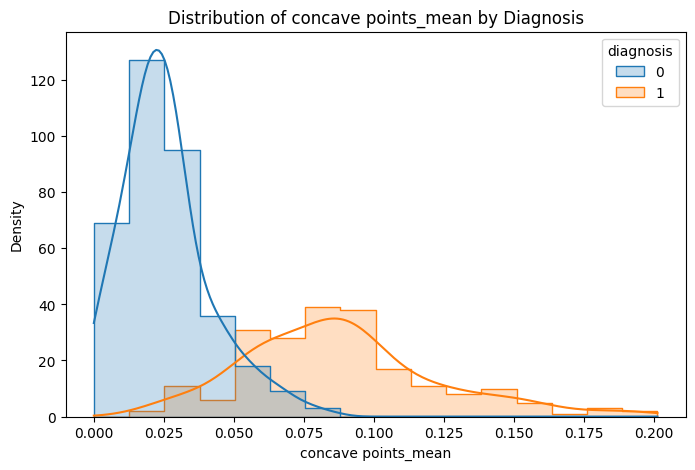

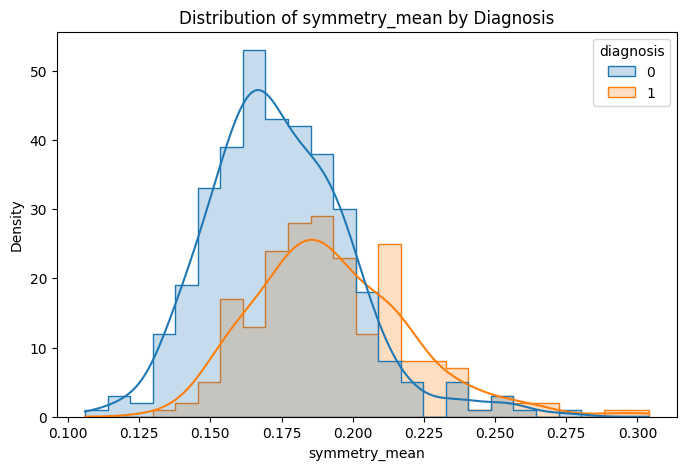

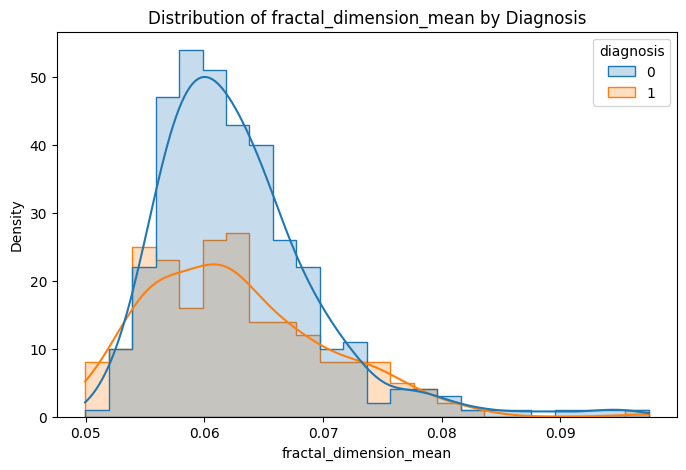

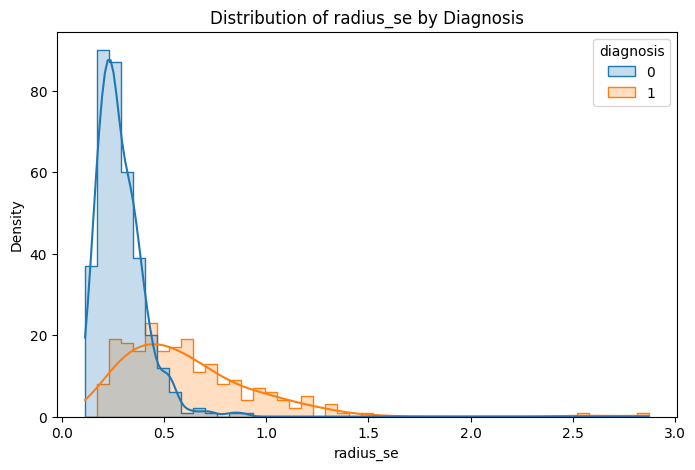

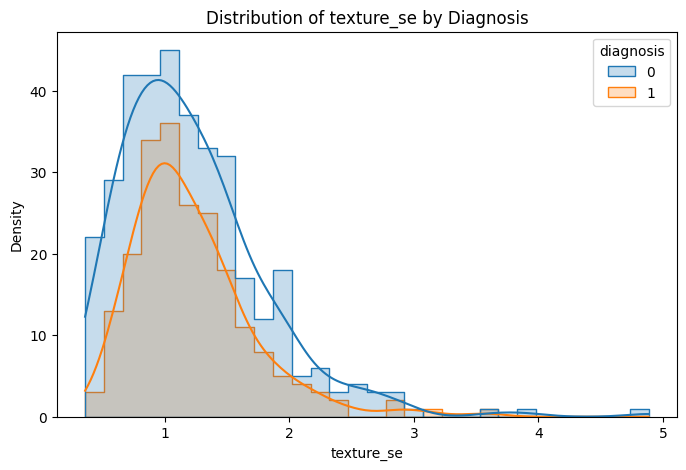

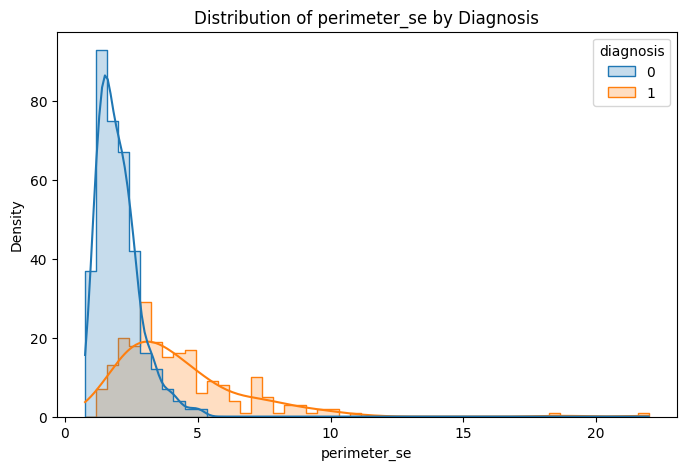

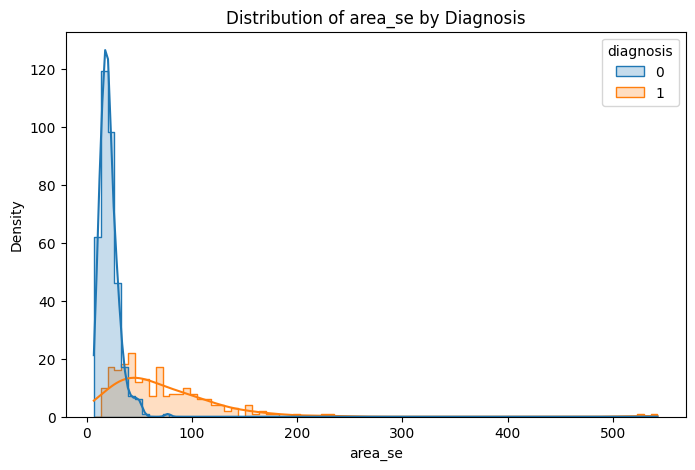

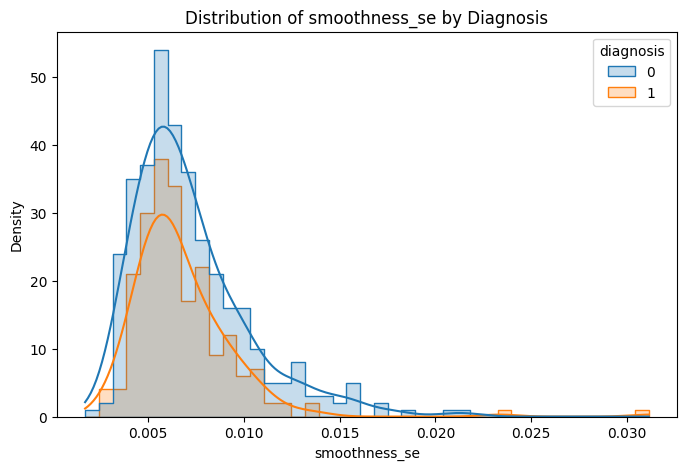

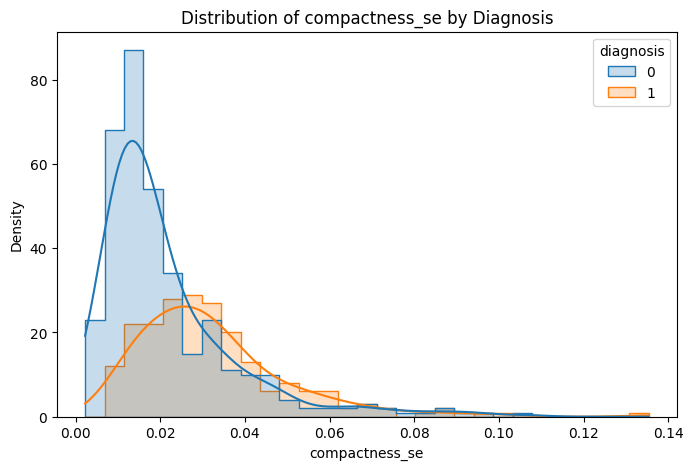

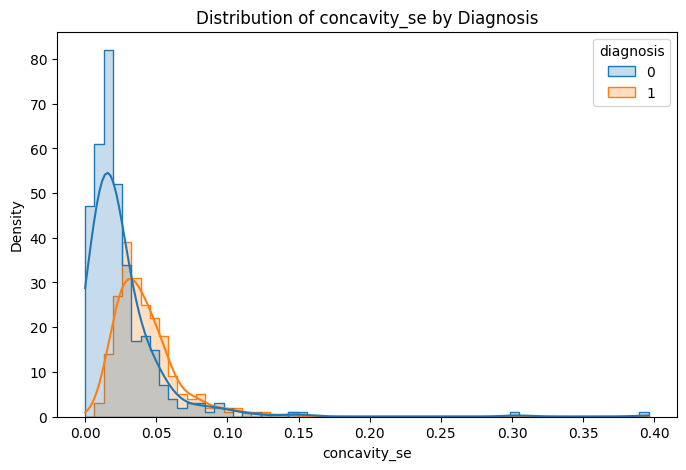

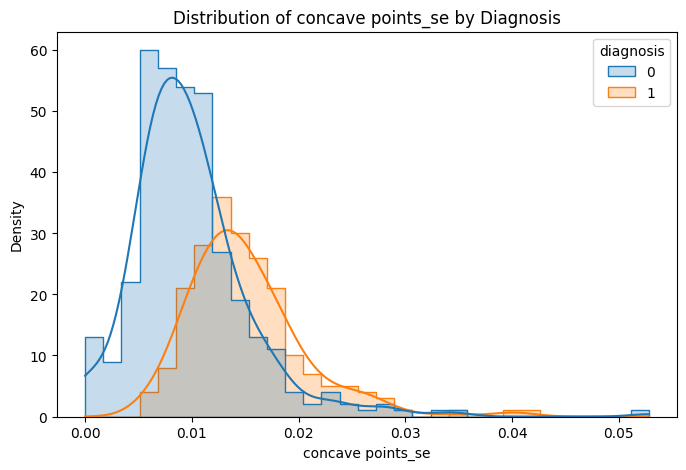

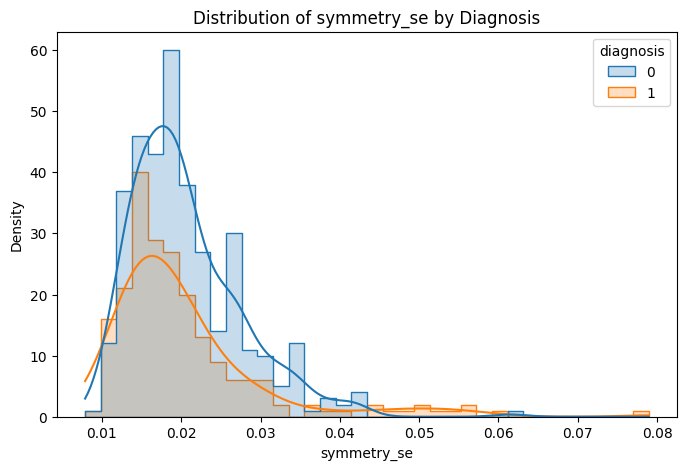

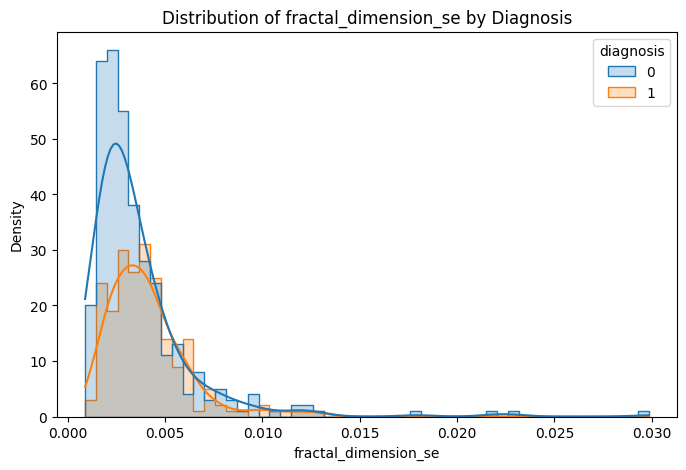

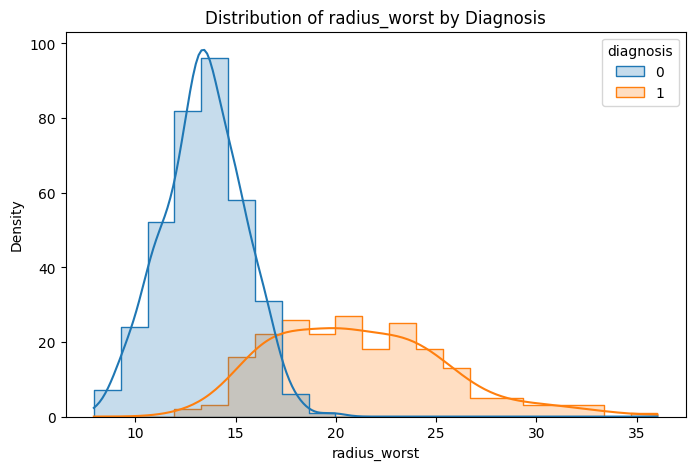

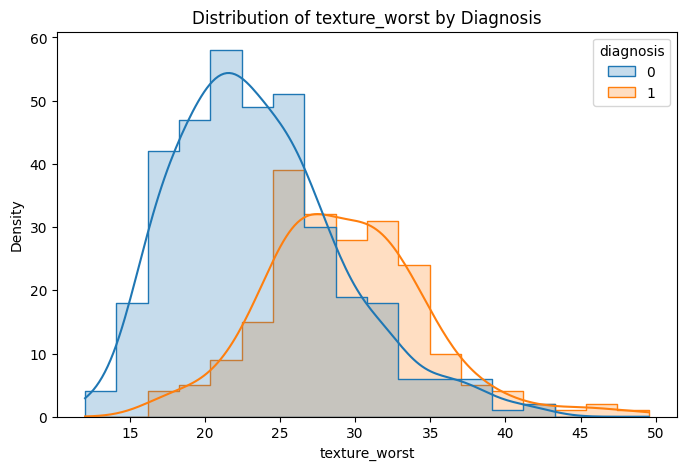

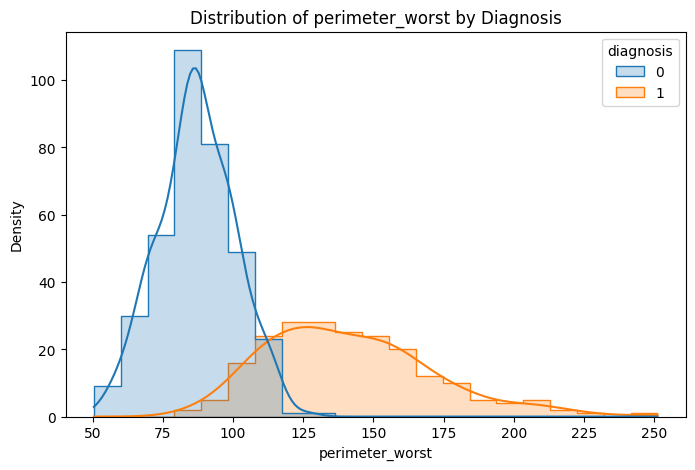

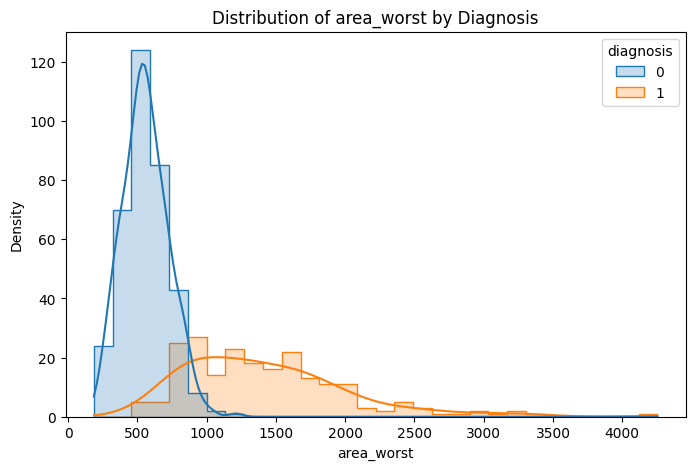

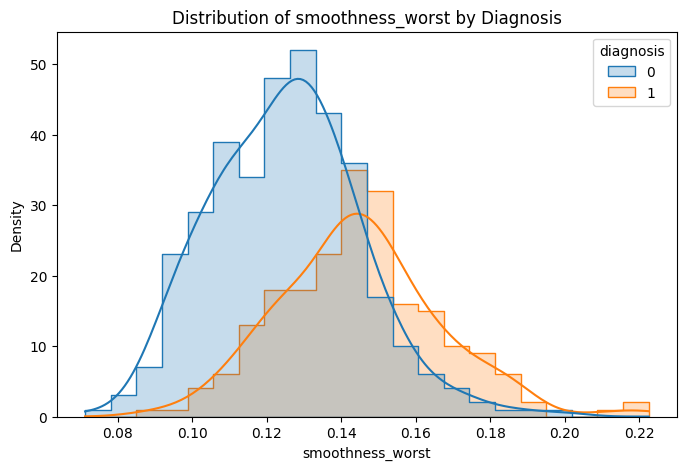

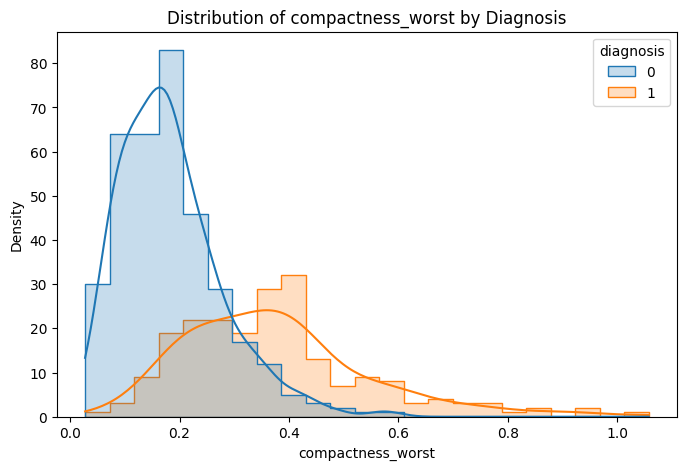

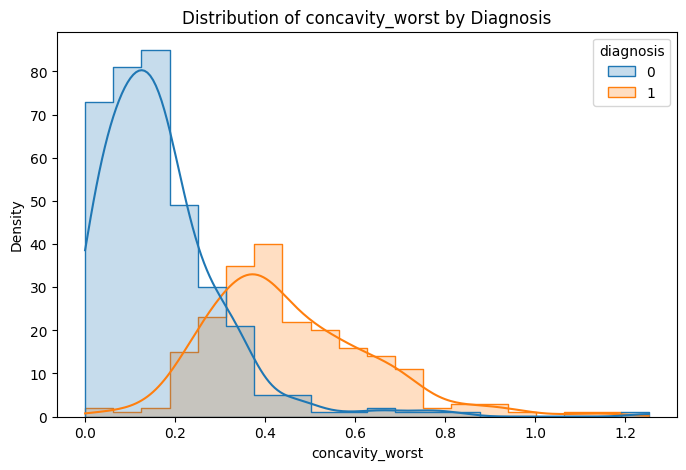

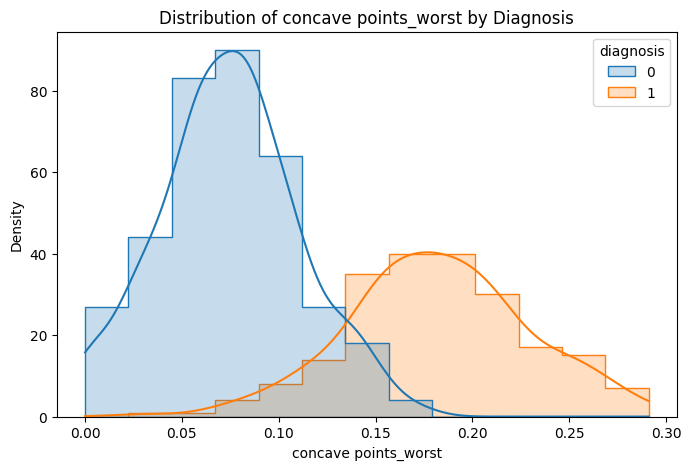

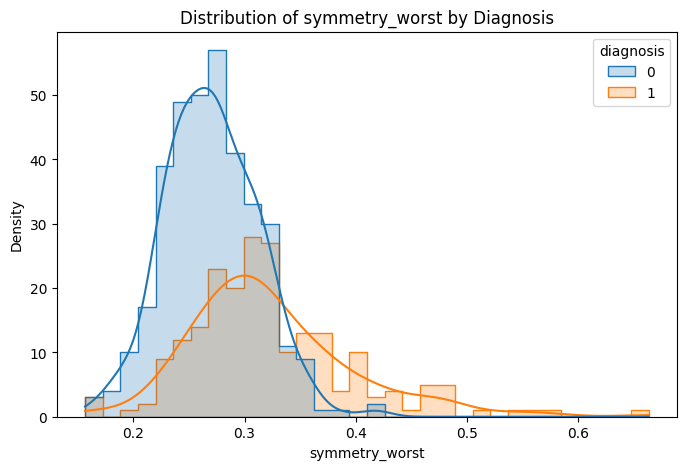

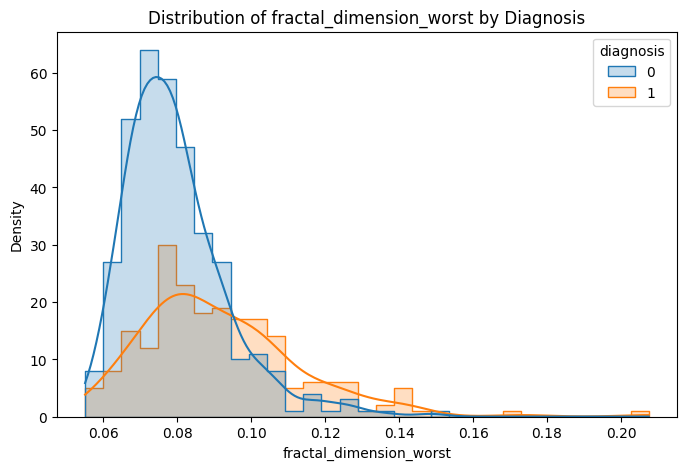

In [33]:
# Plot density plots for each numerical feature, separated by diagnosis
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element="step", common_norm=False)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split your data into X_train_smote, y_train_smote
# (or X_train, y_train if you are not using SMOTE for this part)

# Train a Random Forest model
# You can use X_train_smote and y_train_smote if you want to see importance
# based on the balanced data, or X_train and y_train for original data.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is number of trees
rf_model.fit(X_train_smote, y_train_smote) # Or rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [35]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_smote.columns) # Or X_train.columns

# Sort features by importance in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)


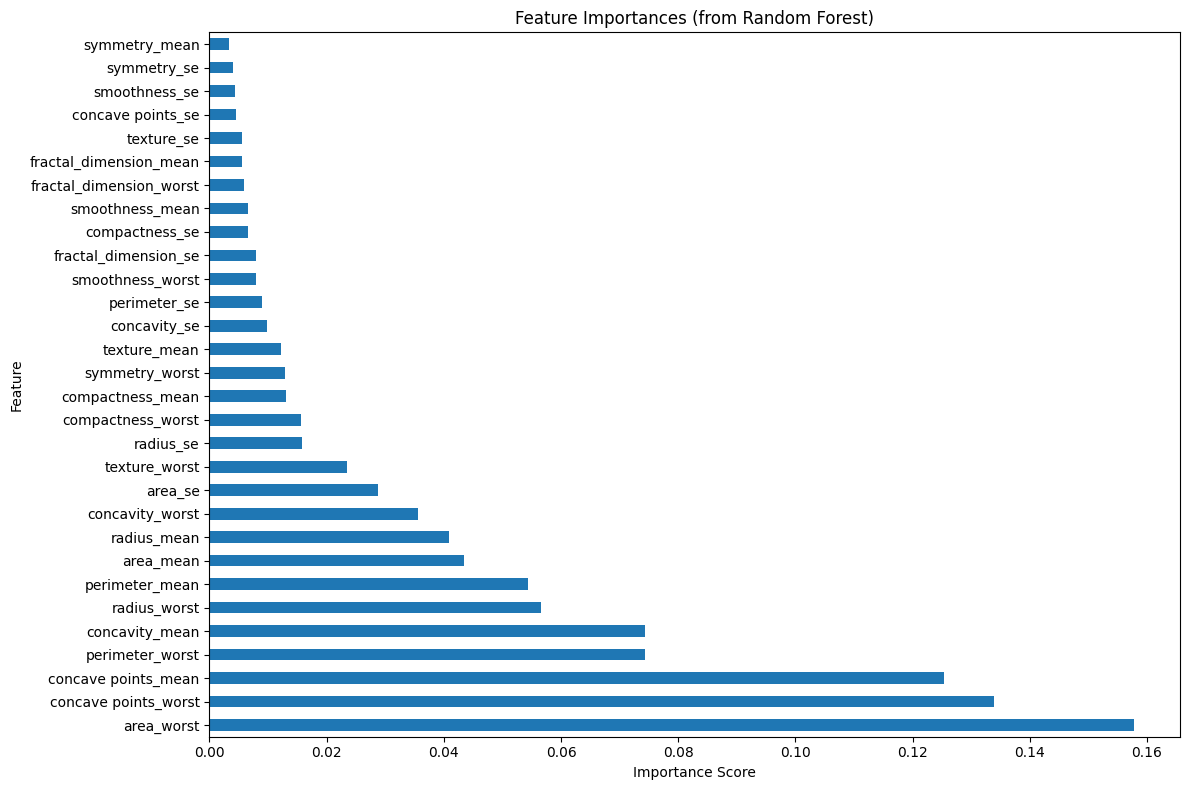

In [36]:
# Plot the feature importances
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
feature_importances_sorted.plot(kind='barh')
plt.title('Feature Importances (from Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### **Conclusion**
1. **KNN** and **GaussianNB** proved effective for binary classification on medical data,despite their different underlying mechanisms, are capable of achieving strong performance on this dataset for breast cancer classification, particularly in minimizing false positives and achieving a good rate of identifying true malignant cases. You can conclude that both models are good candidates for this task based on these evaluation metrics.

2. The **K-Nearest Neighbors model**, particularly when trained on the original, unbalanced dataset, demonstrates strong performance in classifying breast tumors as benign or malignant. Achieving a high **accuracy** of approximately **97.4%**, with perfect **precision (1.00)** and **high recall (0.93)** for the malignant class, the model shows a commendable ability to identify malignant cases while minimizing false positives. This makes it a promising tool for aiding in breast cancer diagnosis. In the future, collecting more data, performing feature engineering, hyperparameter tunning, and exploring other models can lead to improvement in models performance.

3. Based on this classification report, the **Gaussian Naive Bayes model**, even when trained with **SMOTE-balanced data**, also performs exceptionally well. It achieves the same high **accuracy of** approximately **97.4%** as the best-performing KNN model. Crucially, it also demonstrates perfect **precision (1.00)** and **high recall (0.93)** for the malignant class. This means the Gaussian Naive Bayes model, like the best KNN model, is highly effective at identifying malignant tumors while having no false positives for this class.

This project demonstrates proficiency in model comparison, medical data handling, and visual analysis